# Tutorial 6: intersection
___________________________________________________________________________________________

## Overview:
We define an intersection as a point where two roads (each with their own pair of opposing flows) cross but the one road has crossing priority over the other. The priority road can be referred to as the main flow and the other as subordinate flow. Subordinate flow will halt or give way to vehicle encountered from the main flow. When there are not main flow vehicles but only subordinate vehicles then priority is given on a first-come-first-serve (FCFS) basis where the vehicle that halted first may cross first. This is reminiscent of a stop street.
In fact, a stop street could be viewed as an intersection where no priority flow exists. In other words, if no priority is given to a flow then a stop street results.

We will not go into too much detail with the intersection object as they are rather simple. For more information, do consult the documentation by calling `help(__basik__.Intersection)`.

**Note**: the subordinate flows will have designated areas to halt at (white lines).


In [1]:
import __basik__ as bk

/home/dylan/Documents/Basik_Tutorial/__basik__/__init__.py:37: UserWarning: __basik__ has picked up that it is currently being run from within a Ipython or Jupyter Notebook. Display components requireQtA5gg to render. Most Ipython-based interactive notebooks havetheir kernel shut down when using QtA5gg as a Matplotlib backend. Hence, __basik__ will not use QtA5gg. As a result, please refrain from using __basik__ display components while in the Ipython or Jupyter Notebook environment. If display components are required, please use Ipython in a console. The Spyder IDE for Python is highly recommended.
  warnings.warn(message)


Importing matplotlib.pyplot as plt



DISPLAY OFF
Setting up simulation...


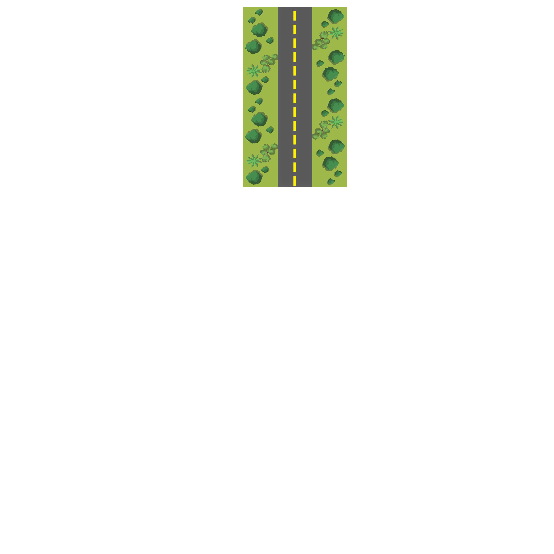

Scheduling Northern arrivals...
..done!
Scheduling Eastern arrivals...
..done!
Scheduling Southern arrivals...
..done!
Scheduling Western arrivals...
..done!
Populating simulation...
...done!


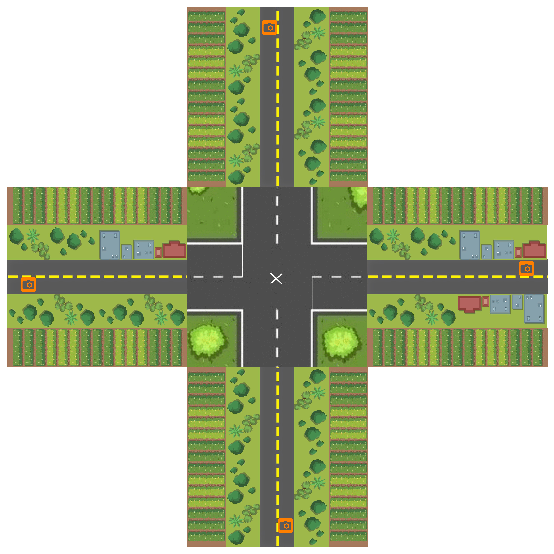

In [8]:
bk.VehicleDisplay.speed_up_factor = 10
bk.Vehicle.frames_per_move = 2
import numpy as np
bk.VehicleDisplay.SHOW = False # TURN OFF
print('DISPLAY OFF')
print('Setting up simulation...')
np.random.seed(123)
fig,ax = bk.axes_grid(3,3,scale=2.5)  
end_time = 21
lane_length = 5 
bk.Queue.clear()
# North:
Nlane_in = bk.Lane(lane_length) 
Nlane_out = bk.Lane(lane_length) 
NDisplay = bk.RoadDisplay(left_lane=Nlane_out,
                          right_lane=Nlane_in,
                          axes=ax[0,1],
                          horizontal=False)
Nrate = {end_time:bk.Rate(1.5)} 
Nsource = bk.Source(vehicle_velocity = 16.67,  
                    target_node = Nlane_in.IN,
                    rate_schedule=Nrate)
print('Scheduling Northern arrivals...')
Nsource.setup_arrivals(end_time)
print('..done!')
Nrecord = bk.Record(Nlane_out.OUT)
# East 
Elane_in = bk.Lane(lane_length) 
Elane_out = bk.Lane(lane_length) 
EDisplay = bk.RoadDisplay(left_lane=Elane_out,
                          right_lane=Elane_in,
                          axes=ax[1,2],
                          horizontal=True)
Erate = {end_time:bk.Rate(0.3)} 
Esource = bk.Source(vehicle_velocity = 16.67,  
                    target_node = Elane_in.IN,
                    rate_schedule=Erate)
print('Scheduling Eastern arrivals...')
Esource.setup_arrivals(end_time)
print('..done!')
Erecord = bk.Record(Elane_out.OUT)  
# South
Slane_in = bk.Lane(lane_length) 
Slane_out = bk.Lane(lane_length) 
SDisplay = bk.RoadDisplay(left_lane=Slane_in,
                          right_lane=Slane_out,
                          axes=ax[2,1],
                          horizontal=False)
Srate = {end_time:bk.Rate(0.5)} 
Ssource = bk.Source(vehicle_velocity = 16.67, 
                    target_node = Slane_in.IN,
                    rate_schedule=Srate)
print('Scheduling Southern arrivals...')
Ssource.setup_arrivals(end_time)
print('..done!')
Srecord = bk.Record(Slane_out.OUT)  
# West
Wlane_in = bk.Lane(lane_length) 
Wlane_out = bk.Lane(lane_length)
WDisplay = bk.RoadDisplay(left_lane=Wlane_in,
                          right_lane=Wlane_out,
                          axes=ax[1,0],
                          horizontal=True)
Wrate = {end_time:bk.Rate(0.5)} 
Wsource = bk.Source(vehicle_velocity = 16.67,  # 60 km/h
                    target_node = Wlane_in.IN,
                    rate_schedule=Wrate)
print('Scheduling Western arrivals...')
Wsource.setup_arrivals(end_time)
print('..done!')
Wrecord = bk.Record(Wlane_out.OUT)

# INTERSECTION 
tpm_dict = {'N':{'N':0,'E':0.1,'S':0.8,'W':0.1},
            'E':{'N':0.3,'E':0,'S':0.4,'W':0.3},
            'S':{'N':0.8,'E':0.1,'S':0,'W':0.1},
            'W':{'N':0.4,'E':0.3,'S':0.3,'W':0}}
        
inter = bk.Intersection(N_main_flow_entrance=Nlane_in.OUT,
                        S_main_flow_entrance=Slane_in.OUT,
                        E_sub_flow_entrance=Elane_in.OUT,
                        W_sub_flow_entrance=Wlane_in.OUT,
                        N_exit=Nlane_out.IN,
                        S_exit=Slane_out.IN,
                        E_exit=Elane_out.IN,
                        W_exit=Wlane_out.IN,
                        tpm=tpm_dict)
inter_display = bk.IntersectionDisplay(inter,
                                       show=['N','E','S','W'],
                                       axes=ax[1,1])
print('Populating simulation...')
bk.Queue.run(end_time/2)
print('...done!')
fig

Turning on display...
...done!
Performing simulation with display...
...done!


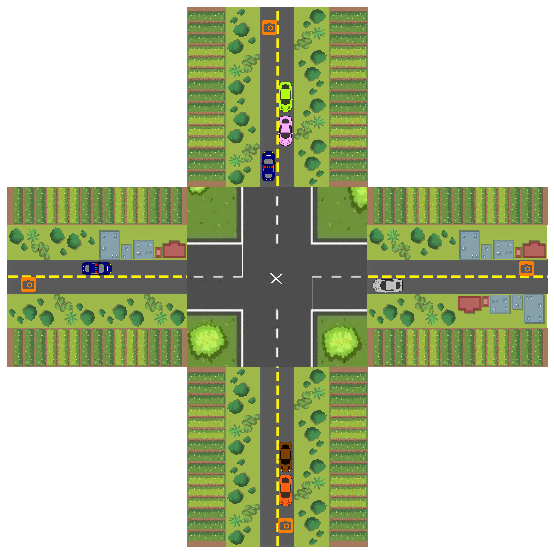

In [9]:
# WITH DISPLAY
print('Turning on display...')
bk.VehicleDisplay.SHOW = True # TURN OFF
for component in bk.Queue.content:
    if isinstance(component,bk.Vehicle):  
        display = component.vehicle_display      
        display.show()
print('...done!')

start_time = bk.Queue.current_time
print('Performing simulation with display...')
#bk.Queue.run(end_time=end_time,
#             start_time=start_time)
print('...done!')
fig

In [10]:
from IPython.display import Video
import os
path = os.getcwd()+'/Videos/intersection.mp4'
video_width = 900  # 1024 default
video_height = 450  # 576 default
Video(path,embed=True,width=video_width,height=video_height)

To reproduce these results/video please see `Basik_Tutorial/Console_Scripts/intersection.py`
